In [217]:
# Import necessary libraries
import numpy as np
import os
from pathlib import Path
from matplotlib import pyplot as plt

### SNR code

In [218]:
def snr(avg_epoch):
    # Calculate the mean and standard deviation of the samples
    mean = np.mean(avg_epoch)
    std = np.std(avg_epoch)
    
    # Calculate the SNR
    snr = mean / (std)
    return snr

### Function for SNR plotting

In [219]:
def snr_fun(snr_plt, sorted_keys, title):
    rms_ax = []
    snr_ax = []
    for rms in sorted_keys:
        snr_ax.append(snr_plt[rms])

    fig, axs = plt.subplots(2,1, figsize=(5,5))

    axs[0].plot(snr_ax)
    axs[0].set_title(title)
    axs[0].set(ylabel='SNR -', xlabel='Epoch Index')
    axs[0].grid()

    axs[1].plot(sorted_keys)
    axs[1].set_title("RMS")
    axs[1].set(ylabel='RMS -', xlabel='Epoch Index')
    axs[1].grid()

    plt.tight_layout()
    plt.show()


        

# Fixed Rejection Level Averaging

In [220]:
def fixed_average(epochs):
    
    threshold = 6 #uV
    valid_epochs = []

    for epoch in epochs:
        rms_amplitude = np.sqrt(np.mean(epoch ** 2))

        # Check if the RMS amplitude is less than the threshold
        if rms_amplitude < threshold:
            # Add the epoch to the list of valid epochs
            valid_epochs.append(epoch)
    
    # Calculate the average evoked potential
    average_fixed_evoked_potential = np.mean(valid_epochs, axis=0)
    return average_fixed_evoked_potential
    

# Weighted Averaging

In [221]:
def weighted_average(epochs):

    # Code for SNR plotting
    sorted_epoch = {}
    shi_vector = []
    for epoch in epochs:
        rms = np.sqrt(np.mean(np.array(epoch**2)))
        sorted_epoch[rms] = epoch

        variance = np.var(epoch)
        shi_vector.append(1/variance)

    sorted_keys = []
    snr_plt = {}
    
    # Code for actual Weighted Averaging
    avg_epoch = np.zeros(np.shape(epochs)[1])
            
    for rms, epoch in sorted_epoch.items():
        variance = np.var(epoch)
        weight = (1/variance)/np.sum(shi_vector)
        avg_epoch += weight*epoch

        #more snr plotting
        sorted_keys.append(rms)
        snr_avg_epoch = snr(avg_epoch)
        snr_plt[rms] = snr_avg_epoch

    snr_fun(snr_plt,sorted_keys,"SNR - Weighted Average")

    #print(avg_epoch)
    return avg_epoch

# Sorted averaging

In [222]:

def sorting_averaging(epochs):
  
    sorted_epoch = {}
    for epoch in epochs:
        rms = np.sqrt(np.mean(np.array(epoch**2)))
        sorted_epoch[rms] = epoch
        
    sorted_keys = sorted(sorted_epoch, key=lambda x: x)
    sum_sorted_epoch = np.zeros(np.shape(epochs)[1])
    avg_sorted_epoch = []
    max_snr = float("-inf")
    best_key = 0
    
    snr_plt = {}
    for i, rms in enumerate(sorted_keys):
        sum_sorted_epoch = sum_sorted_epoch + sorted_epoch[rms]
        avg_sorted_epoch = sum_sorted_epoch / (i+1)
        snr_avg_epoch = snr(avg_sorted_epoch)
        snr_plt[rms] = snr_avg_epoch
        if(snr_avg_epoch > max_snr):
            max_snr = snr_avg_epoch
            best_key = rms
    
    sum_sorted_epoch = np.zeros(np.shape(epochs)[1])
    avg_sorted_epoch = []
    for i, rms in enumerate(sorted_keys):
        sum_sorted_epoch = sum_sorted_epoch + sorted_epoch[rms]
        avg_sorted_epoch = sum_sorted_epoch / (i+1)
        if(rms == best_key):
            break
    snr_fun(snr_plt,sorted_keys,"SNR - Sorting Average")
    
    return avg_sorted_epoch


# RUNS and Prints

[1.4393 1.8899 2.3368 ... 0.7263 0.5273 0.3306]
[-1.8645 -1.5877 -1.2889 ...  6.9415  6.9642  6.901 ]
[-1.901 -1.584 -1.225 ...  0.024  0.283  0.528]
[ 1.8576  2.7578  3.6857 ... -1.6338 -1.3806 -1.0935]
[0.0795 0.3314 0.5644 ... 1.8485 1.3338 0.8524]
[-0.9791 -0.4492  0.1323 ...  2.6204  2.3135  1.9605]
[-3.4257 -3.9475 -4.3934 ... -2.6646 -3.094  -3.4413]
[3.4091 3.6391 3.7838 ... 9.0426 8.5501 8.0273]
[4.1292 3.123  2.0804 ... 8.3669 8.1725 7.9111]
[-4.4785 -4.6332 -4.6927 ...  7.0942  7.3199  7.4731]
[-0.4366 -0.6994 -0.9378 ...  2.0818  2.0981  2.0848]
[-1.0073 -1.3368 -1.7238 ... -1.9668 -2.3781 -2.7597]
[-1.8427 -2.0854 -2.2832 ...  7.2473  6.81    6.3597]
[-0.7921 -0.2764  0.2965 ...  2.4602  2.2949  2.1109]
[ 3.036  2.403  1.757 ... -6.69  -6.286 -5.832]
[ 2.5731  2.3148  2.0024 ... -8.6349 -8.8294 -8.9257]
[-3.6961 -3.8514 -4.0556 ...  1.5204  1.6385  1.7094]
[4.1662 4.0309 3.8107 ... 0.764  0.7463 0.7847]
[-7.0989 -6.5082 -5.7259 ...  3.8391  3.6539  3.5351]
[-4.0232 -4.0516

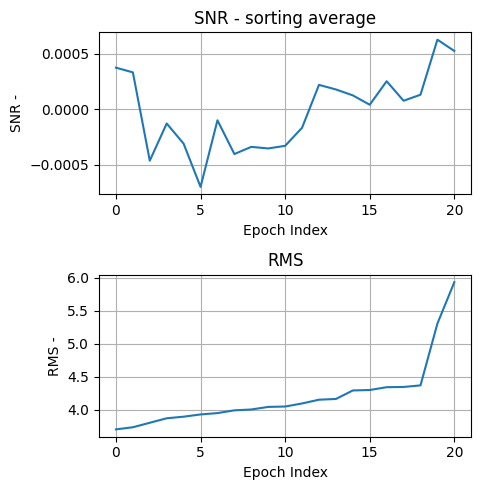

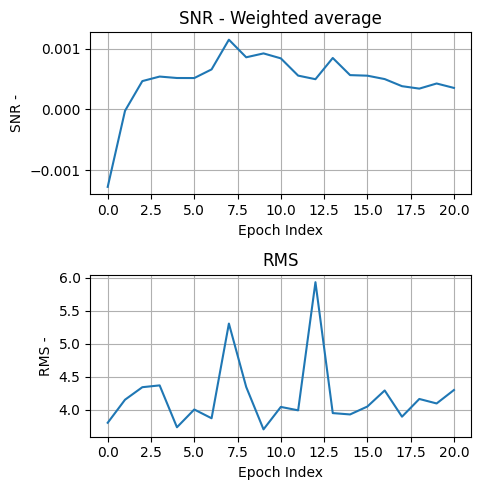

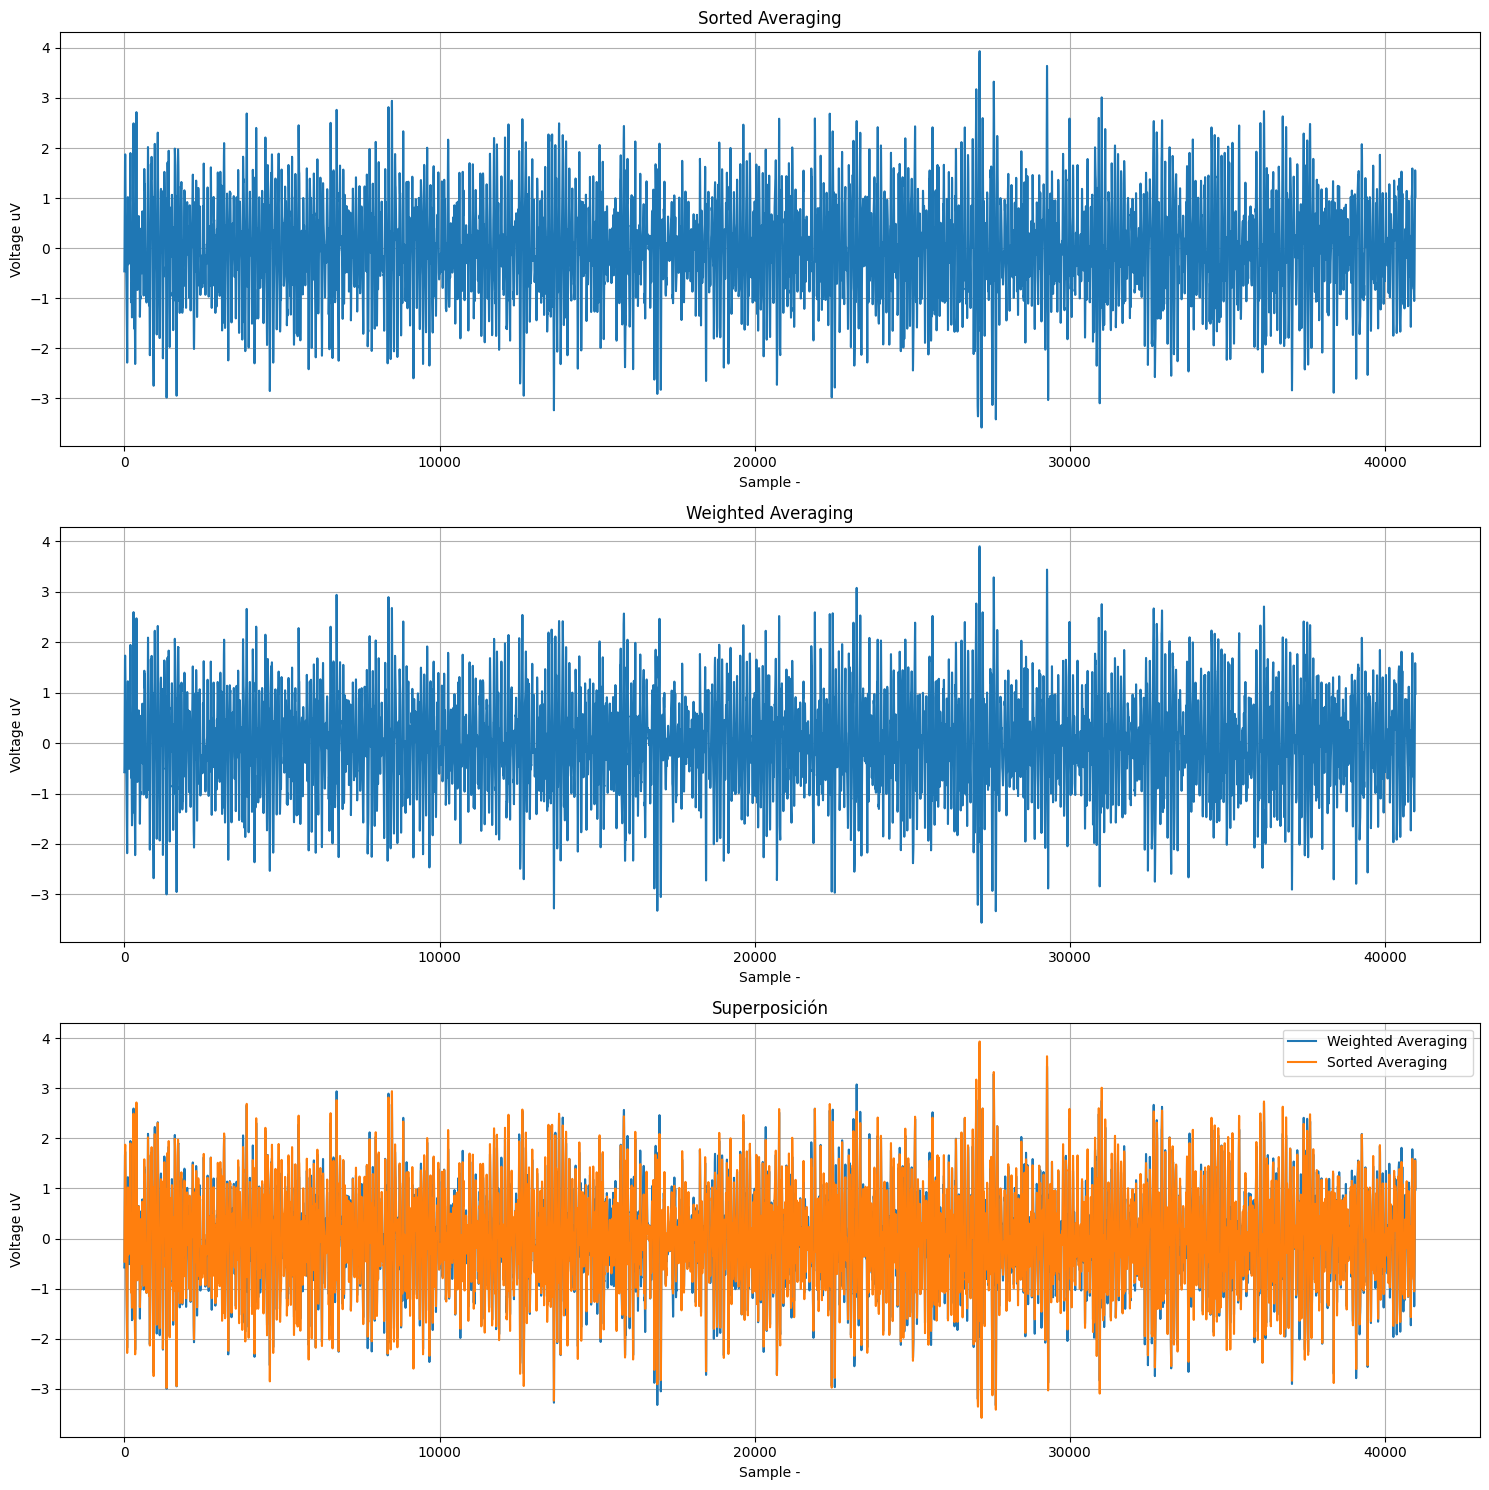

In [223]:
loadPath = os.path.abspath('')+'\data'
archivos = os.listdir(loadPath)

print(archivos)

epochs = []
for i, arch in enumerate(archivos):
    data = np.loadtxt(loadPath+'/'+arch)
    
    epoch = data[:,0]
    print(epoch)
    epochs.append(np.array(epoch))

sorting_avg_evoked_potential= sorting_averaging(epochs)
weighted_avg__evoked_potential= weighted_average(epochs)
#average_fixed_evoked_potential= fixed_average(epochs)

fig, axs = plt.subplots(3,1, figsize=(15, 15))

axs[0].plot(sorting_avg_evoked_potential)
axs[0].set_title("Sorted Averaging")
axs[0].set(ylabel='Voltage uV', xlabel='Sample -')
axs[0].grid()

axs[1].plot(weighted_avg__evoked_potential)
axs[1].set_title("Weighted Averaging")
axs[1].set(ylabel='Voltage uV', xlabel='Sample -')
axs[1].grid()

""" 
axs[2].plot(simple_average)
axs[2].set_title("Average")
axs[2].set(ylabel='Voltage uV', xlabel='Sample -')
axs[2].grid() 
"""

axs[2].set_title("Superposición")
axs[2].plot(weighted_avg__evoked_potential, label="Weighted Averaging")
axs[2].plot(sorting_avg_evoked_potential, label="Sorted Averaging")
#axs[3].plot(average_fixed_evoked_potential, label="Fixed Rejection Level")
axs[2].set(ylabel='Voltage uV', xlabel='Sample -')
axs[2].grid()
axs[2].legend()

plt.tight_layout()

plt.show()  

In [224]:
print(snr(sorting_avg_evoked_potential))
print(snr(weighted_avg__evoked_potential))
#print(snr(average_fixed_evoked_potential))


0.0006252900224912404
0.0003557568651757376
